In [2]:
%pylab inline
from scipy.integrate import quad
import math
import os

import seaborn as sbn
sbn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sbn.set_style( {'font.family':'sans-serif', 'font.sans-serif':'Helvetica'})

Populating the interactive namespace from numpy and matplotlib


In [6]:
#Defining same colours as in plot and other bits

c = ['#e6010c','#277f40', '#face66', '#124080']
cp = sbn.color_palette(['#e6010c','#277f40', '#face66', '#124080'])
cp = sbn.color_palette("colorblind")
alphas = [1.0,1.0,1.0,1.0]
ls = ['solid', 'dashed', 'dashdot', 'dotted']
kT = [2.0,4.0, 8.0, 10.0]

In [7]:
traj_list = []
for k in kT:
    traj_list.append(np.random.normal(k,0.5,1000))

Text(0.5, 0, 'time in a.u.')

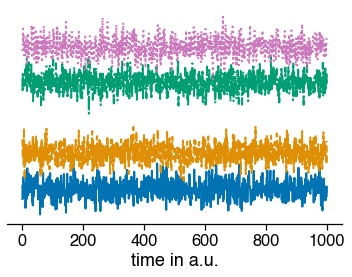

In [9]:
fig, ax = plt.subplots()
plot(traj_list[0],c=cp[0], alpha=alphas[0], linestyle=ls[0])
plot(traj_list[1],c=cp[1], alpha=alphas[1], ls=ls[1])
plot(traj_list[2],c=cp[2], alpha=alphas[2], ls=ls[2])
plot(traj_list[3],c=cp[4],  alpha=alphas[3], ls=ls[3])
sbn.despine(left=True)
ax.set_yticks([])
xlabel('time in a.u.')

#ylabel('Potential in a.u.')


In [10]:
x = np.arange(len(traj_list[0]))

## Let's attempt the histogram idea

[]

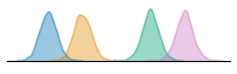

In [11]:
figsize(4,1)
fig, ax = plt.subplots()
sbn.distplot(traj_list[0],color=cp[0], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade": True})
sbn.distplot(traj_list[1],color=cp[1], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade": True})
sbn.distplot(traj_list[2],color=cp[2], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade": True})
sbn.distplot(traj_list[3],color=cp[4], hist=False, bins=100,kde_kws={"alpha": 0.4,"shade": True})
sbn.despine(left=True)
ax.set_yticks([])
ax.set_xticks([])
#plt.savefig('for_shading.svg')

[]

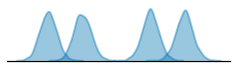

In [13]:
figsize(4,1)
fig, ax = plt.subplots()
sbn.distplot(traj_list[0],color=cp[0], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade":True})
sbn.distplot(traj_list[1],color=cp[0], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade":True})
sbn.distplot(traj_list[2],color=cp[0], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade":True})
sbn.distplot(traj_list[3],color=cp[0], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade":True})
sbn.despine(left=True)
ax.set_yticks([])
ax.set_xticks([])
#plt.savefig('for_shading.svg')

## Let's play around with the idea of also shading in multiple gradients

In [212]:
from matplotlib.colors import *
#cp = sbn.color_palette(['#e6010c','#277f40', '#face66', '#124080'])
#my_cmap = ListedColormap(['#e6010c','#277f40', '#face66', '#124080'], N=20)


In [17]:
c = cp.as_hex()

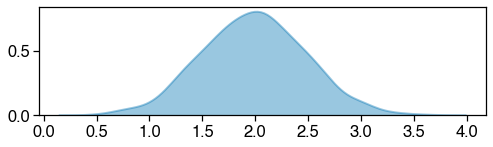

In [19]:
figsize(8,2)
fig, ax = plt.subplots()
sbn.distplot(traj_list[0],color=cp[0], hist=False, bins=100,kde_kws={"alpha": 0.4, "shade":True})

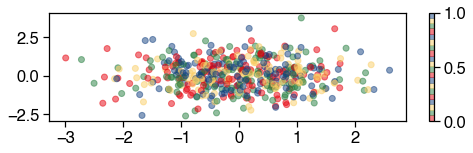

In [213]:
N = 500
data1 = np.random.randn(N)
data2 = np.random.randn(N)
colors = np.linspace(0,1,N)
plt.scatter(data1, data2, c=colors, cmap=my_cmap, alpha=0.5)
plt.colorbar()
plt.show()

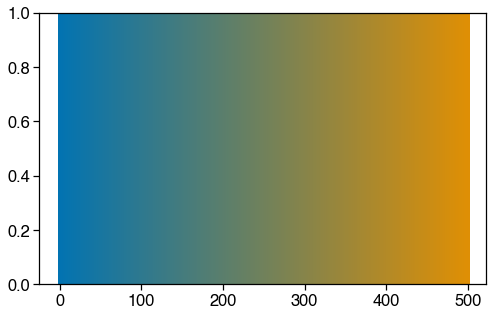

In [20]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1=c[0] #blue
c2=c[1] #green
n=500

fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c[0],c[1],x/n), linewidth=4) 
plt.show()

In [28]:
#The actual plotting data with shaded fills

def plot_data(data, c):
    #plt.plot(data[0],data[1])
    interval = len(data[0])/3
    bound = [60, 80, len(data[0])-1]
    for i in range(len(data[0])-1):
        #print(colorFader(c[0],c[1],i/len(data[0])))
        if i < bound[0]:
            mix = i/bound[0]
            plt.fill_between([data[0][i], data[0][i+1]], [data[1][i], data[1][i+1]], color=colorFader(c[1],c[0],mix), alpha=0.1)
        if i >= bound[0] and i< bound[1]:
            mix = (i-bound[0])/(bound[1]-bound[0])
            plt.fill_between([data[0][i], data[0][i+1]], [data[1][i], data[1][i+1]], color=colorFader(c[0],c[4],mix), alpha=0.1)
        if i >= bound[1]:    

            mix = (i-bound[1])/(bound[2]-bound[1])
            plt.fill_between([data[0][i], data[0][i+1]], [data[1][i], data[1][i+1]], color=colorFader(c[4],c[2],mix), alpha=0.1)

[]

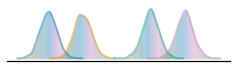

In [29]:
figsize(4,1)
fig, ax = plt.subplots()

data1 = sbn.distplot(traj_list[0],color=cp[0], hist=False, bins=100, kde_kws={"alpha": 0.4}).get_lines()[0].get_data()
data2 = sbn.distplot(traj_list[1],color=cp[1], hist=False, bins=100, kde_kws={"alpha": 0.4}).get_lines()[1].get_data()
data3 = sbn.distplot(traj_list[2],color=cp[2], hist=False, bins=100, kde_kws={"alpha": 0.4}).get_lines()[2].get_data()
data4 = sbn.distplot(traj_list[3],color=cp[4], hist=False, bins=100, kde_kws={"alpha": 0.4}).get_lines()[3].get_data()

plot_data(data1,c)
plot_data(data2,c)
plot_data(data3,c)
plot_data(data4,c)
sbn.despine(left=True)
ax.set_yticks([])
ax.set_xticks([])


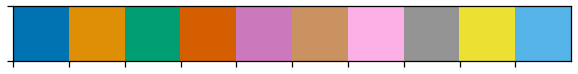

In [31]:
sbn.palplot(cp)